# **Sales Data Analysis**

## **Introduction**

The main objective here is to extract key performance indicators (KPIs) that will help to make data-driven decisions and improve company business. The data used in this case is Sales Data of Electronic Products in the USA.

## **Question to Answer**

1. What is the total number of sales?
2. What was the best month for sales? 
3. What is the average sales per month?
4. What City had the highest sales?
5. What time should we display adverstisement to maximize likelihood of customer's buying product?   6. What product sold the most? Why it sold the most?
7. What products are most often sold together?



In [88]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
#dataset link kaggle--> https://www.kaggle.com/datasets/knightbearr/sales-product-data/download?datasetVersionNumber=1
files=os.listdir(r'C:\Users\User\Downloads\Sales_Data-20221214T162446Z-001\Sales_Data')

In [95]:
for file in files:
    print (file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [96]:
path=r'C:\Users\User\Downloads\Sales_Data-20221214T162446Z-001\Sales_Data'
all_data=pd.DataFrame()
for file in files:
    data=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,data])

all_data.shape    
    

(186850, 6)

In [101]:
os.listdir(r'C:\Users\User\Downloads\Sales_Data-20221214T162446Z-001\Sales_Data')

['all_data.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

## convert it into dataset

In [100]:
#all_data.to_csv(r'C:\Users\User\Downloads\Sales_Data-20221214T162446Z-001\Sales_Data/all_data.csv',index=False)

In [102]:
all_data.shape    

(186850, 6)

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [103]:
all_data.shape    

(186850, 6)

## Data cleaning and formatting

In [104]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [161]:
all_data['Year'].unique()

array([2019, 2020], dtype=int64)

In this dataset we also have some of 2020 data, but in this case I only want to analyze the 2019 data. So, we'll drop the 2020 data.

In [162]:
all_data = all_data[all_data.Year != 2020] # drop rows that contain '2020' in Year column

## checking null values and their sum

In [105]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## dropping null values data where all values are na

In [106]:
all_data=all_data.dropna(how="all")

In [13]:
#all_data.drop(['Order Date'],axis=1)

In [107]:
all_data.shape

(186305, 6)

In [108]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [109]:
'04/19/19 08:46'.split('/')[0]


'04'

In [110]:
def month(x):
    return x.split('/')[0]

In [111]:
all_data['month']=all_data['Order Date'].apply(month)

In [112]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

### columns 'month' and 'Quantity ordered' has string values which needs to be removed

In [113]:
all_data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [114]:
all_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [115]:
filter1=all_data['Quantity Ordered']=='Quantity Ordered'
all_data=all_data[~filter1]


In [116]:
filter2=all_data['month']=='Order Date'
all_data=all_data[~filter2]

In [117]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### changing data type of price each and quantity ordered to int for further analysis

In [118]:
all_data.shape

(185950, 7)

In [119]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [120]:

all_data['Price Each']=all_data['Price Each'].astype(float)

### adding a new column,sales amount to get insights

In [121]:
all_data['sales_amount']=all_data['Quantity Ordered']*all_data['Price Each']

In [122]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                object
sales_amount        float64
dtype: object

In [172]:
all_data.describe()

,Quantity Ordered,Price Each,sales_amount,Hour,Year
count,185916.000000,185916.000000,185916.000000,185916.000000,185916.0
mean,1.124368,184.387720,185.478203,14.415661,2019.0
std,0.442749,332.722426,332.911130,5.421069,0.0
min,1.000000,2.990000,2.990000,0.000000,2019.0
25%,1.000000,11.950000,11.950000,11.000000,2019.0
50%,1.000000,14.950000,14.950000,15.000000,2019.0
75%,1.000000,150.000000,150.000000,19.000000,2019.0
max,9.000000,1700.000000,3400.000000,23.000000,2019.0


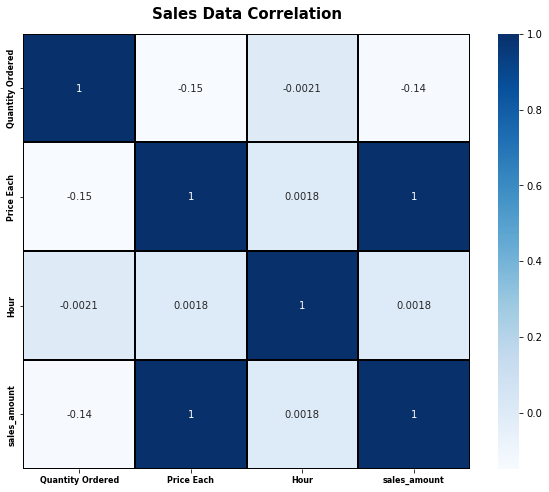

In [177]:
plt.figure(figsize=(10,8))
sns.heatmap(all_data[['Quantity Ordered', 'Price Each', 'month', 'Hour', 'sales_amount']].corr(), 
            annot=True, cmap='Blues',linewidths=0.004, linecolor='Black')

plt.title("Sales Data Correlation", weight="bold", fontsize=15, pad=15) # title
plt.xticks(weight="bold", fontsize=8) # x-ticks
plt.yticks(weight="bold", fontsize=8); # y-ticks

### Q1: What is the total number of sales?

In [ ]:
year_sales = all_data.groupby('Year').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'sales_amount' : 'sum'})
year_sales

### Q2: What was the best month for sales? How much was earned that month?

In [212]:

best_month=all_data.groupby('month')['Quantity Ordered','sales_amount'].sum()
best_month

C:\Users\User\AppData\Local\Temp/ipykernel_13420/1244259277.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best_month=all_data.groupby('month')['Quantity Ordered','sales_amount'].sum()


,Quantity Ordered,sales_amount
month,,
01,10862,1813586.44
02,13449,2202022.42
03,17005,2807100.38
04,20558,3390670.24
05,18667,3152606.75
06,15253,2577802.26
07,16072,2647775.76
08,13448,2244467.88
09,13109,2097560.13


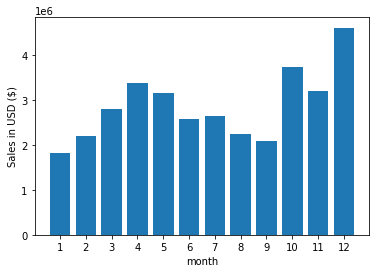

In [228]:
months=range(1,13)
plt.bar(months,all_data.groupby('month')['sales_amount'].sum())
plt.xticks(months)
plt.xlabel('month')
plt.ylabel('Sales in USD ($)')
plt.show()

### Q3:What is the average sales per month?

In [234]:
avg_month_sales = all_data.groupby('month')['sales_amount'].mean()
print('Average Sales by Month')
avg_month_sales

Average Sales by Month


month
01    187.450795
02    183.884962
03    185.250471
04    185.495390
05    190.305852
06    190.187565
07    185.249826
08    187.648849
09    180.497387
10    184.238580
11    182.074956
12    184.655913
Name: sales_amount, dtype: float64

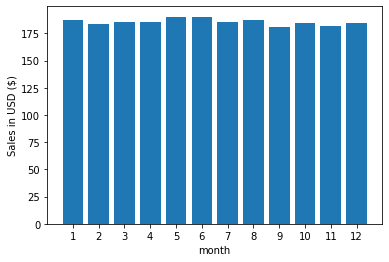

In [235]:
plt.bar(months,all_data.groupby('month')['sales_amount'].mean())
plt.xticks(months)
plt.xlabel('month')
plt.ylabel('Sales in USD ($)')
plt.show()

### Q4: Which city has highest sales

In [125]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [126]:
def city(x):
    return x.split(',')[1]

In [127]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [128]:
all_data.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales_amount,city
5115,241579,USB-C Charging Cable,1,11.95,08/10/19 10:56,"669 13th St, Los Angeles, CA 90001",08,11.95,Los Angeles
13452,222749,27in 4K Gaming Monitor,1,389.99,06/16/19 08:17,"634 Jackson St, Boston, MA 02215",06,389.99,Boston
16697,192493,Apple Airpods Headphones,1,150.00,04/05/19 09:01,"9 River St, Los Angeles, CA 90001",04,150.00,Los Angeles


In [129]:
all_data.groupby('city')['sales_amount'].sum().sort_values(ascending=False)

city
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: sales_amount, dtype: float64

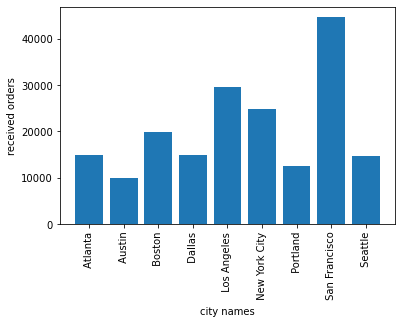

In [130]:
plt.bar(all_data.groupby('city')['sales_amount'].sum().index,all_data.groupby('city')['sales_amount'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

### Q5: What time should we display advertisements to maximise for product purchase?

In [131]:
all_data['Order Date'][0].dtype

dtype('O')

In [132]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [133]:
all_data['Hour']

0         8
2        22
3        14
4        14
5         9
         ..
11681    20
11682    16
11683     7
11684    17
11685     0
Name: Hour, Length: 185950, dtype: int64

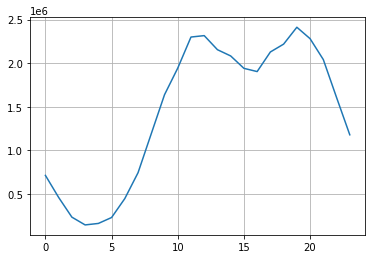

In [134]:
plt.grid()
plt.plot(all_data.groupby('Hour')['sales_amount'].sum())
plt.show()

### therefore between 12pm and 7pm is probably the best time to advertise to maximise product purchase

### Q6:What products were sold the most and why ?

<AxesSubplot:xlabel='Product'>

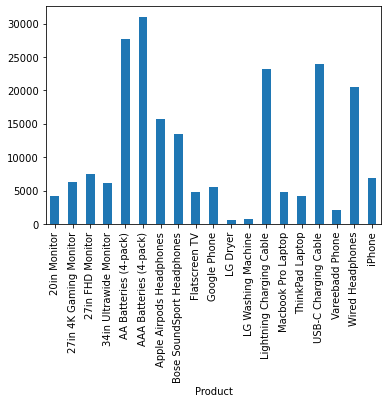

In [135]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [136]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\User\AppData\Local\Temp/ipykernel_13420/2467287211.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

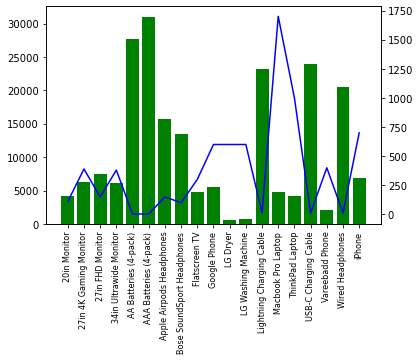

In [137]:
plt.figure(figsize=(40,24))
fig1,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

### As it is evident from the visualization that AAA batteries are sold the most as their price is lower than other items

### Q7:What products are most often sold together?

In [139]:
all_data.shape


(185950, 10)

In [140]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales_amount,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04,99.99,Boston,11


In [141]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\User\AppData\Local\Temp/ipykernel_13420/4182328167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [142]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales_amount,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [143]:
#lets drop out all duplicate Order ID
df1 = df.drop_duplicates(subset=['Order ID'])

In [144]:
df1.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales_amount,city,Hour,Grouped
7230,183454,iPhone,1,700.0,04/07/19 11:33,"604 Park St, Portland, ME 04101",04,700.0,Portland,11,"iPhone,Apple Airpods Headphones"
4673,181027,iPhone,1,700.0,04/02/19 19:08,"112 Lake St, New York City, NY 10001",04,700.0,New York City,19,"iPhone,Lightning Charging Cable"
10678,186753,Google Phone,1,600.0,04/18/19 09:38,"529 8th St, Portland, OR 97035",04,600.0,Portland,9,"Google Phone,Wired Headphones"
1195,163144,iPhone,1,700.0,03/27/19 23:50,"160 West St, Dallas, TX 75001",03,700.0,Dallas,23,"iPhone,Lightning Charging Cable"
9222,185364,Vareebadd Phone,1,400.0,04/16/19 18:04,"356 Walnut St, Boston, MA 02215",04,400.0,Boston,18,"Vareebadd Phone,USB-C Charging Cable"


<AxesSubplot:ylabel='Grouped'>

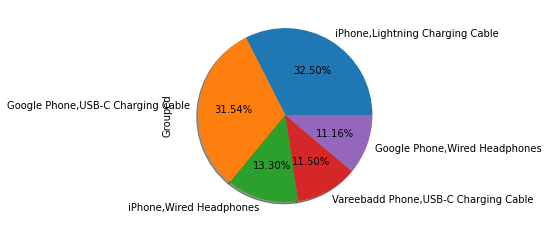

In [236]:
df1['Grouped'].value_counts()[0:5].plot.pie(shadow=True,autopct='%1.2f%%')

In [146]:
df1.shape

(7136, 11)

In [147]:
all_data.shape

(185950, 10)

### So, these are the five top items which are bought together 